In [89]:
import pandas as pd
import numpy as np
from itertools import product

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.tree import export_graphviz

from graphviz import Source

In [91]:
data = pd.read_csv("iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
data.rename(columns={'Species':'target'}, inplace=True)

label_column = ['target']
features_columns = list(set(data.columns) - set(label_column))

train, test = train_test_split(data)

# Simple Decision Tree

In [99]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[features_columns], train[label_column])

test['prediction'] = tree.predict(test[features_columns])

In [94]:
pd.crosstab(test['target'], test['prediction'])

prediction,setosa,versicolor,virginica
target,,,
setosa,10,0,0
versicolor,0,12,2
virginica,0,0,14


# Use cross validation on Decision Tree to get more acurate results on the model test

In [101]:
cv = KFold(n_splits=10)
possible_min_samples_split = [20,10]
possible_min_sample_leaf = [10,5,2]
for min_samples_split, min_sample_leaf in product(possible_min_samples_split, possible_min_sample_leaf):
    tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=min_samples_split, min_samples_leaf=min_sample_leaf, random_state=99)
    average_score = np.mean(cross_val_score(tree, data[features_columns], data[label_column], cv=cv))
    output_string = "Min Sample Split: %s, Min Sample Leaf: %s, Average Score: %0.3f"%(min_samples_split, min_sample_leaf, average_score)
    print(output_string)
    

Min Sample Split: 20, Min Sample Leaf: 10, Average Score: 0.933
Min Sample Split: 20, Min Sample Leaf: 5, Average Score: 0.940
Min Sample Split: 20, Min Sample Leaf: 2, Average Score: 0.940
Min Sample Split: 10, Min Sample Leaf: 10, Average Score: 0.933
Min Sample Split: 10, Min Sample Leaf: 5, Average Score: 0.940
Min Sample Split: 10, Min Sample Leaf: 2, Average Score: 0.940


## Wih a verry naive analysis we should keep the Min Sample Split: 20, Min Sample Leaf: 5 model, to avoid any possible overfitting it could have when having leaves too small to be stadistically significant.

### We do a last fit with all the data as the model si already selected and we are not doing validation

In [103]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, min_samples_leaf=5, random_state=99)
tree.fit(data[features_columns], data[label_column])

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=20, random_state=99)

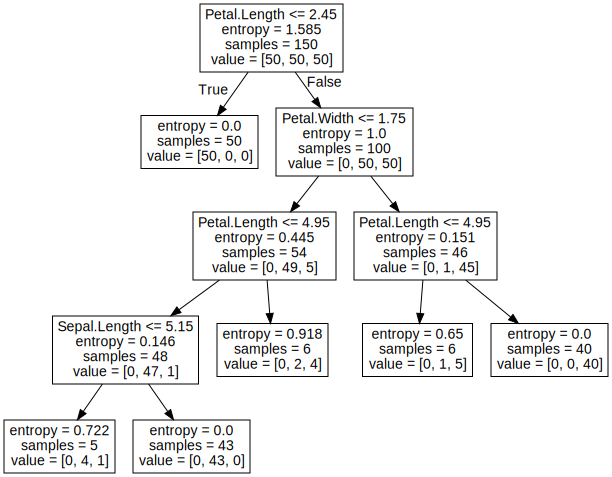

In [104]:
with open("tree_graph.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=features_columns)
    dotfile.close()
    
file = open("tree_graph.dot", "r")
text = file.read()
Source(text)